## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Handling pre-processed data

In [2]:
df = pd.read_csv('../preprocess_data.csv')
df.drop(['task_2','Unnamed: 0','text'], axis=1, inplace=True)
df.head()

,Unnamed: 0.1,_id,task_1,text_clean
0,4986,60c5d6bf5659ea5e55defa2c,HOF,made amp amp onli abl start make money sustain...
1,3394,60c5d6bf5659ea5e55def461,HOF,technic still turn back clock dick head
2,1310,60c5d6bf5659ea5e55defaad,NOT,govt stop think world media liber gang ani opt...
3,3390,60c5d6bf5659ea5e55def419,HOF,soldier japan dick head
4,4626,60c5d6bf5659ea5e55def7fa,HOF,would better ask think sleazi shitbag lmao


Text(0, 0.5, 'Frequency')

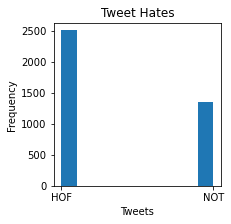

In [3]:
fig, ax = plt.subplots(figsize=(3,3))

ax.hist(df['task_1'])

ax.set_title('Tweet Hates')
ax.set_xlabel('Tweets')
ax.set_ylabel('Frequency')

In [4]:
print(df.isnull().values.any())

True


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5)
X = tfidfconverter.fit_transform(df['text_clean'].values.astype('U')).toarray()
y = df['task_1']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

## Using various ML techniques to find the accuracy

In [7]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[153 227]
 [ 43 154]]


0.5320623916811091

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[358  22]
 [ 96 101]]


0.7954939341421143

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 18, metric = 'minkowski', p = 2)
kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 
bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      classifier.fit(x_train,y_train)
      predictions = classifier.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 18, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[335  45]
 [102  95]]


0.7452339688041595

In [12]:
from sklearn.model_selection import RepeatedKFold

In [13]:
from sklearn.svm import LinearSVC
sv = LinearSVC()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      sv.fit(x_train,y_train)
      predictions = sv.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

0.7662337662337663
0.7766233766233767
0.7864583333333334
0.8151041666666666


In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      rf.fit(x_train,y_train)
      predictions = rf.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

0.7740259740259741
0.7844155844155845
0.7942708333333334
0.7994791666666666
0.8103896103896104
